# Logistic Regression in Machine Learning


# Introduction to Logistic Regression

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

# Types of Logistic Regression

Generally, logistic regression means binary logistic regression having binary target variables, but there can be two more categories of target variables that can be predicted by it. Based on those number of categories, Logistic regression can be divided into following types −

#### Binary or Binomial

In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.


#### Multinomial

In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent "Type A" or "Type B" or "Type C".


#### Ordinal

In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent "poor" or "good", "very good", "Excellent" and each category can have the scores like 0,1,2,3.

# Logistic Regression Assumptions

Before diving into the implementation of logistic regression, we must be aware of the following assumptions about the same −

In case of binary logistic regression, the target variables must be binary always and the desired outcome is represented by the factor level 1.

There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other .

We must include meaningful variables in our model.

We should choose a large sample size for logistic regression.

# Binary Logistic Regression Model

The simplest form of logistic regression is binary or binomial logistic regression in which the target or dependent variable can have only 2 possible types either 1 or 0. It allows us to model a relationship between multiple predictor variables and a binary/binomial target variable. In case of logistic regression, the linear function is basically used as an input to another function such as 𝑔 in the following relation −

hθ(x)=g(θTx) 

where0≤hθ≤1

Here, 𝑔 is the logistic or sigmoid function which can be given as follows −

g(z)=11+e−z 

wherez=θTx

To sigmoid curve can be represented with the help of following graph. We can see the values of y-axis lie between 0 and 1 and crosses the axis at 0.5.

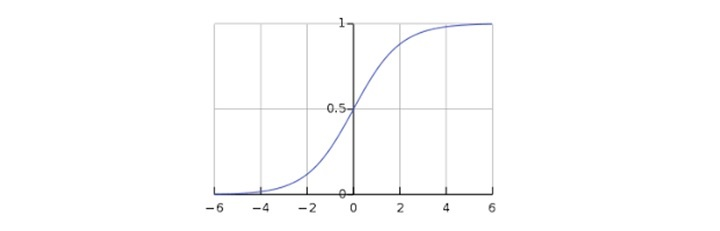

The classes can be divided into positive or negative. The output comes under the probability of positive class if it lies between 0 and 1. For our implementation, we are interpreting the output of hypothesis function as positive if it is ≥0.5, otherwise negative.

We also need to define a loss function to measure how well the algorithm performs using the weights on functions, represented by theta as follows −


h=g(Xθ)


J(θ)=1m.(−yTlog(h)−(1−y)Tlog(1−h))


Now, after defining the loss function our prime goal is to minimize the loss function. It can be done with the help of fitting the weights which means by increasing or decreasing the weights. With the help of derivatives of the loss function w.r.t each weight, we would be able to know what parameters should have high weight and what should have smaller weight.

The following gradient descent equation tells us how loss would change if we modified the parameters −


δJ(θ)δθj=1mXT(g(Xθ)−y)

Implementation of Binary Logistic Regression Model in Python
Now we will implement the above concept of binomial logistic regression in Python. For this purpose, we are using a multivariate flower dataset named ‘iris’ which have 3 classes of 50 instances each, but we will be using the first two feature columns. Every class represents a type of iris flower.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
# Next, load the iris dataset as follows −

iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

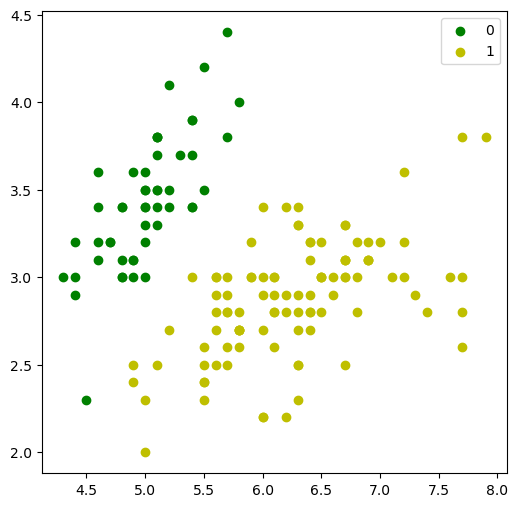

In [3]:
# We can plot our training data s follows −

plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [4]:
# Next, we will define sigmoid function, loss function and gradient descend 

class LogisticRegression:
    def __init__(self, num_iter=100000, lr=0.01, verbose=False, fit_intercept=True):
        self.num_iter = num_iter
        self.lr = lr
        self.verbose = verbose
        self.fit_intercept = fit_intercept
        self.theta = None

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            if self.verbose and i % 10000 == 0:
                print(f'loss: {loss} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()


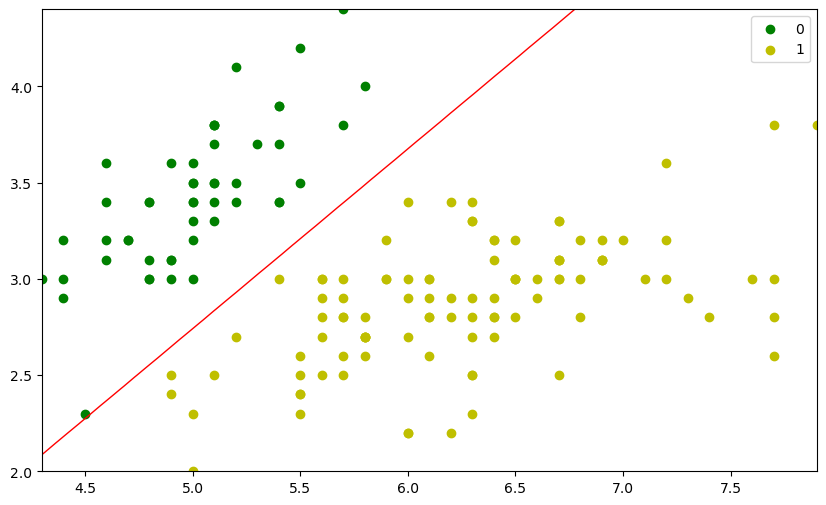

In [5]:
#Next, we can evaluate the model and plot

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X,y)
preds = model.predict(X)
(preds == y).mean()

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');

# Multinomial Logistic Regression Model

Another useful form of logistic regression is multinomial logistic regression in which the target or dependent variable can have 3 or more possible unordered types i.e. the types having no quantitative significance.

Implementation of Multinomial Logistic Regression Model in Python
Now we will implement the above concept of multinomial logistic regression in Python. For this purpose, we are using a dataset from sklearn named digit.

In [6]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [7]:
# we need to load digit dataset
digits = datasets.load_digits()

In [8]:
# Now, define the feature matrix(X) and response vector(y)
X = digits.data
y = digits.target

In [9]:
# With the help of next line of code, we can split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [10]:
# Now create an object of logistic regression 

digreg = linear_model.LogisticRegression()

In [11]:
# Now, we need to train the model by using the training sets

digreg.fit(X_train, y_train)

C:\Users\SaiKiranByriKshema\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Next, make the predictions on testing set

y_pred = digreg.predict(X_test)

In [13]:
# Next print the accuracy of the model

print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 96.52294853963839
